In [1]:
import pandas as pd

#데이터 로드
data = pd.read_csv('/content/drive/My Drive/project/finance prediction/005930KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-29,25380.0,25700.0,25120.0,25620.0,258.570831,11519950.0
1,2015-06-30,25520.0,25700.0,25320.0,25360.0,255.946747,9870350.0
2,2015-07-01,25360.0,26040.0,25180.0,25900.0,261.396729,8324900.0
3,2015-07-02,25720.0,26080.0,25700.0,25980.0,262.204163,8223000.0
4,2015-07-03,25740.0,25880.0,25340.0,25360.0,255.946747,7130200.0


In [2]:
data = data.dropna()
h_price = data['High'].values
l_price = data['Low'].values

In [3]:
#중간 가격 계산
mid_price = (h_price + l_price) / 2

In [4]:
#window 만들기
#최근 50일치를 이용해서 내일 것을 예측해보자


In [5]:
seq_len = 50 #window size
sequence_length = seq_len + 1 #50개를 가지고 그 다음 1개를 예측하기 때문에 1개 플러스 // 하나씩 예측하며 윈도우를 계속 넘긴다.

result=[]
for idx in range(len(mid_price) - sequence_length):
  result.append(mid_price[idx : idx+sequence_length])

In [6]:
norm_data = []
for window in result:
  norm_window = [((float(w)/float(window[0]))-1) for w in window]
  norm_data.append(norm_window)

In [7]:
import numpy as np
result = np.array(norm_data)

In [8]:
result.shape

(1171, 51)

In [9]:
#train 90 test 10
nrow = int(round(result.shape[0]*0.9))
train = result[:nrow,:]
np.random.shuffle(train)

x_train = train[:,:-1] #50개만 넣을것
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[nrow:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[nrow:,-1]

In [10]:
x_train.shape, x_test.shape

((1054, 50, 1), (117, 50, 1))

In [11]:
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (50,1)))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(x_train, y_train,
          validation_data=(x_test, y_test), batch_size=10, epochs=20)

Train on 1054 samples, validate on 117 samples
Epoch 1/20
1054/1054 [==============================] - 6s 5ms/step - loss: 0.0015 - accuracy: 0.0038 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 2/20
1054/1054 [==============================] - 5s 5ms/step - loss: 8.6596e-04 - accuracy: 0.0038 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 3/20
1054/1054 [==============================] - 5s 5ms/step - loss: 7.6828e-04 - accuracy: 0.0038 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 4/20
1054/1054 [==============================] - 5s 5ms/step - loss: 6.5576e-04 - accuracy: 0.0038 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 5/20
1054/1054 [==============================] - 5s 5ms/step - loss: 6.0147e-04 - accuracy: 0.0038 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/20
1054/1054 [==============================] - 5s 5ms/step - loss: 5.6105e-04 - accuracy: 0.0038 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 7/20
1054/1054 [=======================

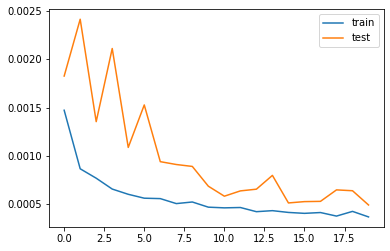

In [14]:
import matplotlib.pyplot as plt
#dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])

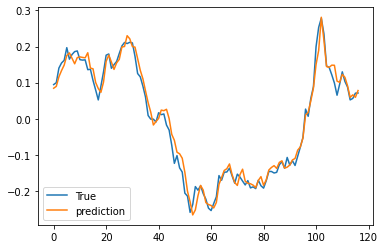

In [15]:
import matplotlib.pyplot as plt
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()


In [16]:
y_test

array([ 0.09481916,  0.1       ,  0.14060964,  0.15459883,  0.16195122,
        0.1970297 ,  0.16519174,  0.17814961,  0.18611379,  0.1879771 ,
        0.16384181,  0.16257089,  0.16334283,  0.13610039,  0.13723608,
        0.1062201 ,  0.07996237,  0.05233645,  0.09039548,  0.12998102,
        0.17624148,  0.1795122 ,  0.13998082,  0.14995224,  0.15880654,
        0.18085106,  0.20177165,  0.2114061 ,  0.20841683,  0.21193728,
        0.21021021,  0.17302925,  0.12536729,  0.11632454,  0.09073359,
        0.06037736,  0.00919963, -0.00091575, -0.00089206, -0.00883392,
        0.01684397,  0.01159679,  0.01345291, -0.01719457, -0.03096539,
       -0.07295374, -0.12333037, -0.1018018 , -0.13587444, -0.14745917,
       -0.20580357, -0.21403354, -0.25905172, -0.23728814, -0.18765743,
       -0.19768404, -0.18523207, -0.20718463, -0.22235772, -0.24738956,
       -0.25404531, -0.23455285, -0.21591837, -0.15717927, -0.17004219,
       -0.14792388, -0.14721254, -0.13676732, -0.15803109, -0.17

In [24]:
te = mid_price[-365:]
seq_len=50
sequence_length = seq_len + 1

result = []
for  idx in range(len(te)-sequence_length):
  result.append(te[idx: idx+sequence_length])


normalized_data = []
window_mean = []
window_std = []

for window in result:
  normalized_window = [((p - np.mean(window)) / np.std(window)) for p in window]
  normalized_data.append(normalized_window)
  window_mean.append(np.mean(window))
  window_std.append(np.std(window))

result = np.array(normalized_data)

x_test = result[:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[:, -1]

x_test.shape


(314, 50, 1)

In [25]:
te

array([38000., 37225., 38350., 38575., 38950., 39875., 40250., 40275.,
       40475., 41075., 41775., 42175., 42325., 42350., 41800., 42725.,
       44250., 45050., 44925., 45600., 46600., 46600., 46650., 45175.,
       44625., 45450., 46350., 46825., 46250., 46350., 45800., 46800.,
       46700., 46800., 47300., 46975., 47000., 45800., 45450., 44625.,
       44000., 44175., 44300., 44050., 44550., 44075., 43925., 43975.,
       43800., 43725., 43650., 45150., 46625., 45225., 45300., 44925.,
       44750., 44550., 45150., 45725., 46275., 46625., 47075., 46700.,
       46575., 46375., 46475., 46450., 47250., 47100., 47300., 46375.,
       45625., 45500., 45250., 44900., 44550., 44400., 45625., 45825.,
       45775., 45675., 44850., 44525., 43350., 42950., 42775., 42200.,
       42800., 41875., 41450., 41825., 43150., 43100., 43625., 43100.,
       42675., 42550., 41700., 42425., 42475., 43200., 43350., 43950.,
       43900., 44450., 44775., 44675., 43900., 43725., 43725., 44075.,
      

In [26]:
pred = model.predict(x_test)

In [27]:
pred_result = []
pred_y = []

for i in range(len(pred)):
  n1 = (pred[i] * window_std[i]) + window_mean[i]
  n2 = (y_test[i] * window_std[i]) + window_mean[i]
  pred_result.append(n1)
  pred_y.append(n2)

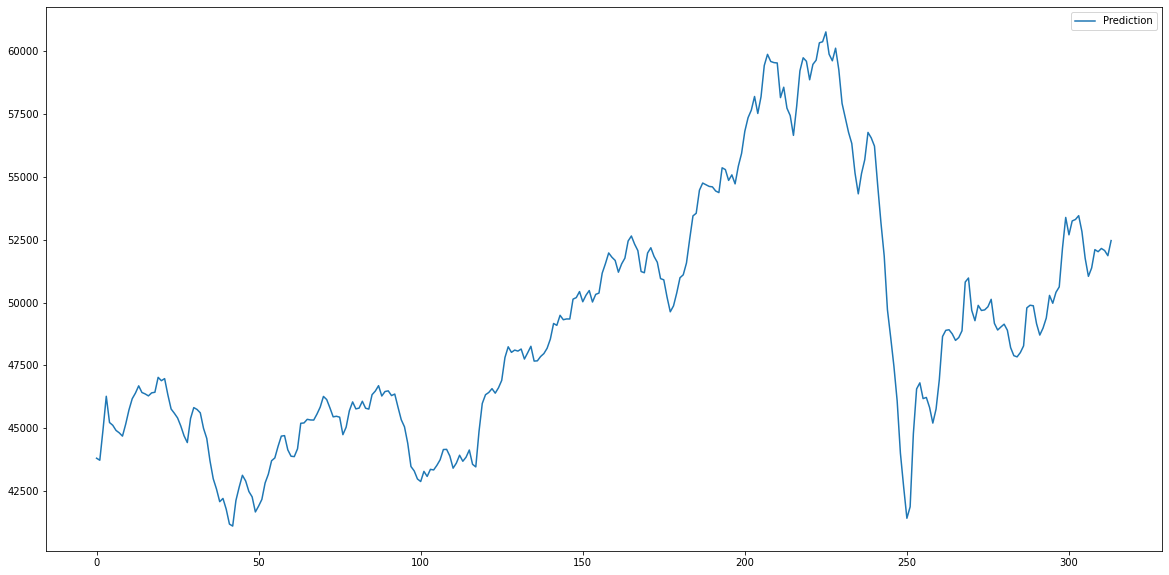

In [28]:

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pred_result, label='Prediction')
ax.legend()
plt.show()

In [29]:
pred_result

[array([43805.734], dtype=float32),
 array([43724.816], dtype=float32),
 array([44945.594], dtype=float32),
 array([46270.957], dtype=float32),
 array([45226.4], dtype=float32),
 array([45116.95], dtype=float32),
 array([44912.785], dtype=float32),
 array([44815.203], dtype=float32),
 array([44684.355], dtype=float32),
 array([45166.27], dtype=float32),
 array([45728.203], dtype=float32),
 array([46171.926], dtype=float32),
 array([46398.766], dtype=float32),
 array([46685.8], dtype=float32),
 array([46421.566], dtype=float32),
 array([46364.51], dtype=float32),
 array([46285.805], dtype=float32),
 array([46406.715], dtype=float32),
 array([46430.42], dtype=float32),
 array([47025.066], dtype=float32),
 array([46891.004], dtype=float32),
 array([46973.547], dtype=float32),
 array([46328.89], dtype=float32),
 array([45764.684], dtype=float32),
 array([45595.133], dtype=float32),
 array([45407.617], dtype=float32),
 array([45084.11], dtype=float32),
 array([44695.945], dtype=float32),
 a

In [31]:
pred_result[-1]

array([52468.867], dtype=float32)